In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df_csv = 'expression_data_frame.csv'
df = pd.read_csv(df_csv)

In [4]:
siginfopath = "GSE70138_Broad_LINCS_sig_info_2017-03-06.txt"
sig_info = pd.read_csv(siginfopath, sep="\t")

geneinfopath = 'GSE70138_Broad_LINCS_gene_info_2017-03-06.txt'
gene_info = pd.read_csv(geneinfopath, sep="\t")

In [5]:
promoters = []
repressors = []
for i in range(1, len(df.columns)):
    col_name = df.columns[i]
    col = df[col_name]
    col_gene_symbol = sig_info[sig_info.sig_id == col_name].pert_iname.iloc[0]

    min_i = col.idxmin()
    max_i = col.idxmax()
    min_gene_id = df[min_i-1:min_i].rid.iloc[0]
    max_gene_id = df[max_i-1:max_i].rid.iloc[0]

    min_gene_symbol = gene_info[gene_info.pr_gene_id == min_gene_id].pr_gene_symbol.iloc[0]
    max_gene_symbol = gene_info[gene_info.pr_gene_id == max_gene_id].pr_gene_symbol.iloc[0]
    # promotion and repression are swapped
    promoters.append((col_gene_symbol, min_gene_symbol))
    repressors.append((col_gene_symbol, max_gene_symbol))

In [7]:
header = '''digraph G {
'''
footer = '''}'''
graph_spec = ''
graph_spec += header
for regulator, promoted in promoters:
    regulator = regulator.replace('-', '_')
    promoted = promoted.replace('-', '_')
    graph_spec += '\t{A} -> {B};\n'.format(A=regulator, B=promoted)
for regulator, repressed in repressors:
    regulator = regulator.replace('-', '_')
    repressed = repressed.replace('-', '_')
    graph_spec += '\t{A} -> {B};\n'.format(A=regulator, B=repressed)
graph_spec += footer
out_gv = 'gene_graph.gv'
with open(out_gv, 'w') as w:
    w.write(graph_spec)
from subprocess import call
call(['dot', out_gv, '-Tpng', '-o', 'gene_graph.png'])

In [44]:
graph_spec = {}
genes = list(gene_info.pr_gene_symbol.unique())
possibles = set()
for regulator, promoted in promoters:
    possibles.add(regulator)
    possibles.add(promoted)
for regulator, repressed in repressors:
    possibles.add(regulator)
    possibles.add(repressed)
graph_spec['nodes'] = []
for gene in genes:
    if gene in possibles:
        gene_obj = {}
        gene_obj['name'] = gene
        graph_spec['nodes'].append(gene_obj)
    
graph_spec['links'] = []
for regulator, promoted in promoters:
    link_obj = {}
    try:
        link_obj['source'] = genes.index(regulator)
        link_obj['target'] = genes.index(promoted)
#         link_obj['weight'] = 1
    except Exception as e:
        continue
    graph_spec['links'].append(link_obj)
    break
import json
with open('d3_graph_data.json', 'w') as w:
    json.dump(graph_spec, w)

# from subprocess import call
# call(['dot', out_gv, '-Tpng', '-o', 'gene_graph.png'])

True

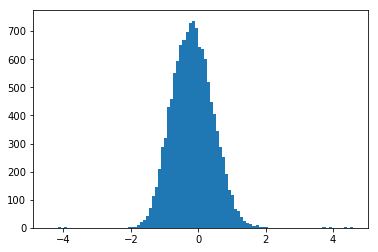

MIN -4.44288730621 8997
MAX 4.59407663345 11788


In [79]:
# TODO: Ignore first columns as it's the rid?
i = 1
to_plot = df[df.columns[i]]
plt.hist(to_plot, bins=100)
plt.show()
print('MIN', to_plot.min(), to_plot.idxmin())
print('MAX', to_plot.max(), to_plot.idxmax())
rid = df[0:1].rid.iloc[0]

In [36]:
a = {}
a['b'] = 1
del a['c']
a

KeyError: 'c'

In [66]:
col_name = df.columns[i]
pert_name = sig_info[sig_info.sig_id == col_name].pert_iname.iloc[0]
row_id = i
sig_info[sig_info.sig_id == col_name].pert_iname

113871    AKT2
Name: pert_iname, dtype: object

In [5]:
for i in range(len(df.columns)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882


In [6]:
unique_regs = set()
for reg, pro in promoters:
#     print(reg)
    unique_regs.add(reg)

In [15]:
print(len(promoters))
print(len(unique_regs))
print(sorted(unique_regs))
print(promoters)

3882
53
['ACLY', 'AKT1', 'AKT2', 'AURKB', 'AXL', 'BCL2L1', 'BRAF', 'CAMK1', 'CDH1', 'CHMP2A', 'CIC', 'CRKL', 'CTSK', 'CXCR4', 'DIDO1', 'EGFR', 'ERBB3', 'ERG', 'EXO1', 'FASN', 'FN1', 'HDAC1', 'HDAC2', 'HDAC3', 'IGF2BP2', 'INSM2', 'ITGA11', 'JUN', 'KEAP1', 'KIT', 'KRAS', 'KRT19', 'MAPKAPK2', 'MAST4', 'MTOR', 'MTTP', 'MYC', 'NF1', 'PFDN2', 'PIK3CA', 'PLXNA1', 'PPP2R2C', 'PTP4A1', 'RPS6', 'SMAD2', 'SMAD3', 'SMAD4', 'TGFBR1', 'TGFBR2', 'TINF2', 'TLK2', 'TP53', 'ZEB1']
[('AKT2', 'INF2'), ('CAMK1', 'SH3GL1'), ('KRAS', 'DIAPH1'), ('CRKL', 'CHST15'), ('IGF2BP2', 'COQ9'), ('CRKL', 'KIF13B'), ('PPP2R2C', 'GAA'), ('BRAF', 'PLXNB2'), ('PFDN2', 'RFNG'), ('DIDO1', 'CKAP4'), ('KRAS', 'RRAS2'), ('ERG', 'TMEM59'), ('RPS6', 'RNF38'), ('AURKB', 'NR2F1'), ('AKT1', 'TMEM214'), ('MTOR', 'EIF2S2'), ('CXCR4', 'PER3'), ('MTOR', 'CDK5RAP1'), ('CHMP2A', 'TMEM59'), ('IGF2BP2', 'AMPD3'), ('CXCR4', 'NAA35'), ('TGFBR1', 'MRPS7'), ('MTTP', 'DDX18'), ('TP53', 'SERPINF1'), ('MAPKAPK2', 'SLIT2'), ('FN1', 'COL19A1'), ('TG

In [17]:
for reg, pro in promoters:
    if reg == 'ACLY':
        print(reg, pro)
#     if pro in unique_regs:
#         print(pro)

ACLY MZF1
ACLY TRIM44
ACLY DVL3
ACLY SH3GL1
ACLY ZMYM4
ACLY PIK3CB
ACLY MZF1
ACLY WTAP
ACLY MINA
ACLY LYPD1
ACLY DNAJB6
ACLY PSME4
ACLY MZF1
ACLY SH3GL1
ACLY SFN
ACLY POLD4
ACLY MZF1
ACLY HADH
ACLY PIK3CB
ACLY KAT6B
ACLY S100A13
ACLY RFNG
ACLY CHCHD2
ACLY MZF1
ACLY MZF1
ACLY PRG2
ACLY FGFR2
ACLY NCF1C
ACLY INPP5A
ACLY MZF1
ACLY MZF1
ACLY NCF1C
ACLY AACS
ACLY HNRNPD
ACLY NAA35
ACLY SH3GL1
ACLY MZF1
ACLY KCNMB4
ACLY PRG2
ACLY SREK1
ACLY IP6K2
ACLY CLTB
ACLY PIK3CB
ACLY NR2F6
ACLY SREK1
ACLY MYO1E
ACLY NR2F1
ACLY DPYS
ACLY SNN
ACLY MZF1
ACLY TRIM44
ACLY SH3GL1
ACLY PTHLH
ACLY NAA35
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY MZF1
ACLY PHLDA1
ACLY ATP10A
ACLY MYO1E
ACLY OAS1
